In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train
import utilities

In [4]:
import ast
import os

from collections import Counter, defaultdict

In [5]:
# data = utilities.read_all_gcj()

In [6]:
# data = utilities.filter_by_count(data, 35, 70)

In [7]:
# print(sorted(data.keys()))

In [8]:
batch_sampler = train.StratifiedBatcherPreprocessed({}, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [9]:
utilities.load_batcher(batch_sampler, "./experiments/GCJ-108/plain/")

In [10]:
batch_sampler.classes

['201000',
 'Ardem0',
 'Aussiroth0',
 'BlueFish0',
 'Bugloon0',
 'ChevalierMalFet0',
 'ChrisJ0',
 'EricStansifer0',
 'FatAlex0',
 'Fizu0',
 'GauravRai0',
 'Hato0',
 'HexTree0',
 'Hiking0',
 'IBar0',
 'Jethol0',
 'JustinKang0',
 'Kabie0',
 'KennethUlrich0',
 'Koumes210',
 'LouisP0',
 'ME.py0',
 'Nin00',
 'P.S.0',
 'Peter.Smit0',
 'Phayr0',
 'QuentinB0',
 'RalfKistner0',
 'RudyGuillan0',
 'SAPikachu0',
 'Sean2230',
 'Servy0',
 'Shurick0',
 'Sibi0',
 'SierraBravo0',
 'Simozene0',
 'Soloman0',
 'Sp30000',
 'Taizo0',
 'Tonto0',
 'VuryLeo0',
 'Wanseira0',
 'Wesley0',
 'YOBA0',
 'alexamici0',
 'ali.assaf0',
 'ana.valeije0',
 'argusdusty0',
 'axr1230',
 'barryd0',
 'bbest0',
 'bigOnion0',
 'brad0',
 'chuck0',
 'cocoatomo0',
 'coraline0',
 'd.operator0',
 'damo.yu0',
 'dareonion0',
 'dennis.lissov0',
 'diver0',
 'dkirienko0',
 'dozingcat0',
 'elffikk0',
 'falcon1123580',
 'farin0',
 'fishball0',
 'gsz0',
 'hector.zhao0',
 'hirano.y.aa0',
 'icedtrees0',
 'j4b0',
 'jgaten0',
 'killerrex0',
 'kuma

In [11]:
batch_sampler.get_n_classes()

108

In [12]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 array([13, 12, 12, 15, 16, 12, 12, 21, 13, 12, 16, 17, 16, 12, 12, 12, 12,
        17, 14, 18, 14, 16, 22, 13, 14, 12, 13, 20, 12, 15, 12, 14, 12, 13,
        14, 16, 17, 24, 12, 14, 12, 12, 15, 12, 12, 37, 16, 15, 12, 12, 18,
        33, 18, 12, 16, 12, 28, 30, 20, 34, 13, 18, 19, 12, 12, 12, 12, 17,
        12, 12, 16, 16, 19, 24, 12, 13, 13, 12, 12, 13, 31, 13, 15, 17, 14,
      

In [13]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107]),
 array([ 4,  3,  4,  4,  4,  3,  3,  6,  4,  4,  5,  5,  5,  3,  3,  3,  3,
         5,  4,  5,  4,  4,  6,  4,  4,  4,  4,  5,  4,  4,  3,  4,  3,  4,
         4,  4,  5,  6,  4,  4,  3,  3,  4,  3,  4, 10,  4,  4,  4,  4,  5,
         9,  5,  4,  4,  3,  7,  8,  5,  9,  4,  5,  5,  3,  3,  4,  4,  5,
         3,  3,  5,  5,  5,  6,  4,  4,  4,  3,  3,  4,  8,  4,  4,  5,  4,
      

In [14]:
model_params = {
    "n_classes":batch_sampler.get_n_classes(),
    "encoder_params": {
        "embedding_dims":100,
        "combiner_dims":100,
        "name_embedding_dims":100,
        "dropout":0.2,
        "num_layers":1, "rnn_dropout":0.0,
        "most_common_names_file":"most_common_names_all_datasets.pkl",
        "OOV_ID":0
        
    },
    'regularizer_alpha':0.001,
    'regularizer_alpha_names':0.0001
}

In [15]:
track_metric = {
    "metric_name":"accuracy",
    "function":train.validate_max
}

In [17]:
path = "./experiments/GCJ-108/regularized-sep-coef-names/"
if os.path.exists(path):
    raise ValueError()

In [18]:
cls = model.NameModel(model_params)

In [19]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()), track_metric, path)

In [20]:
torch.set_num_threads(1)

In [21]:
# trainer.train_metrics['grads_embeddings']

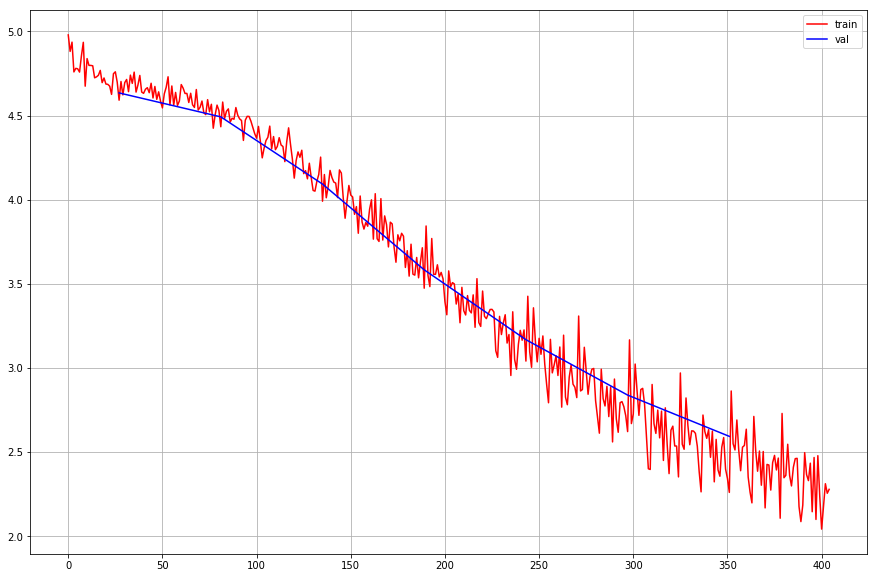

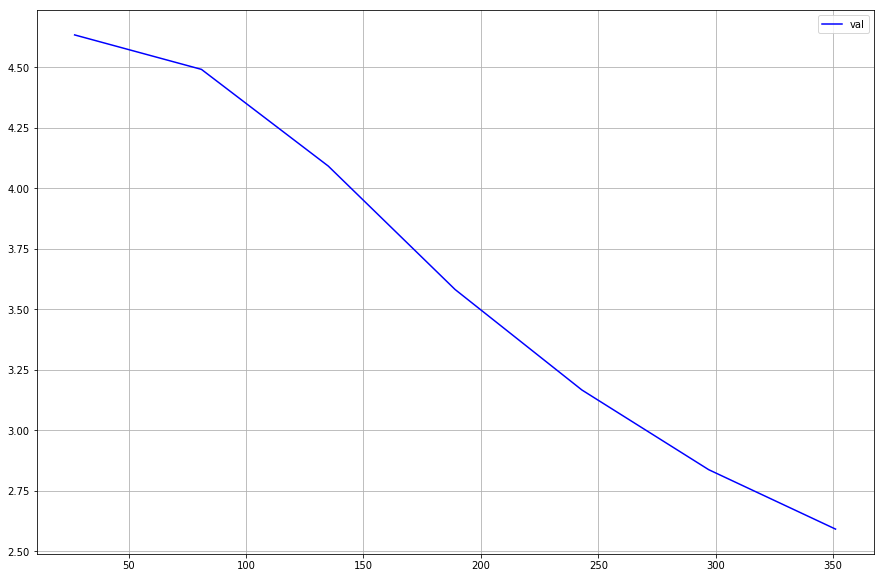

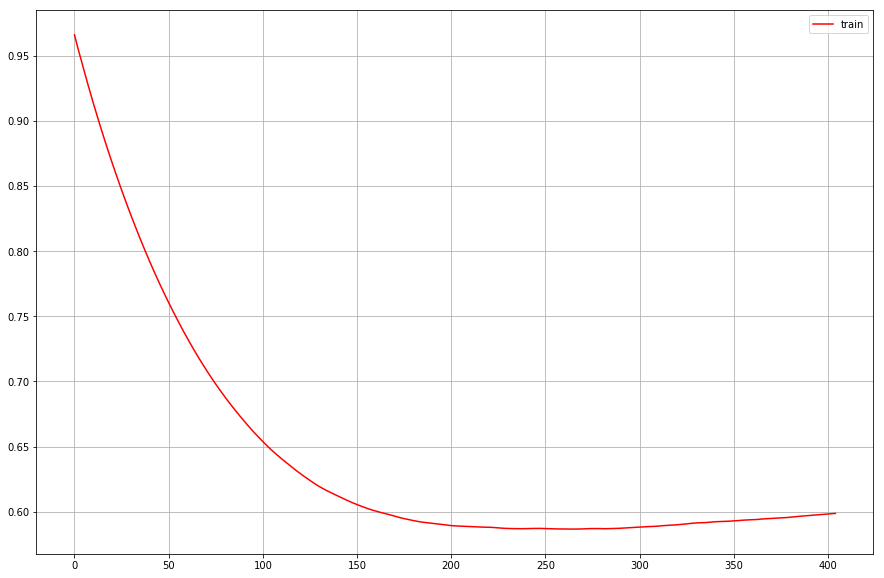

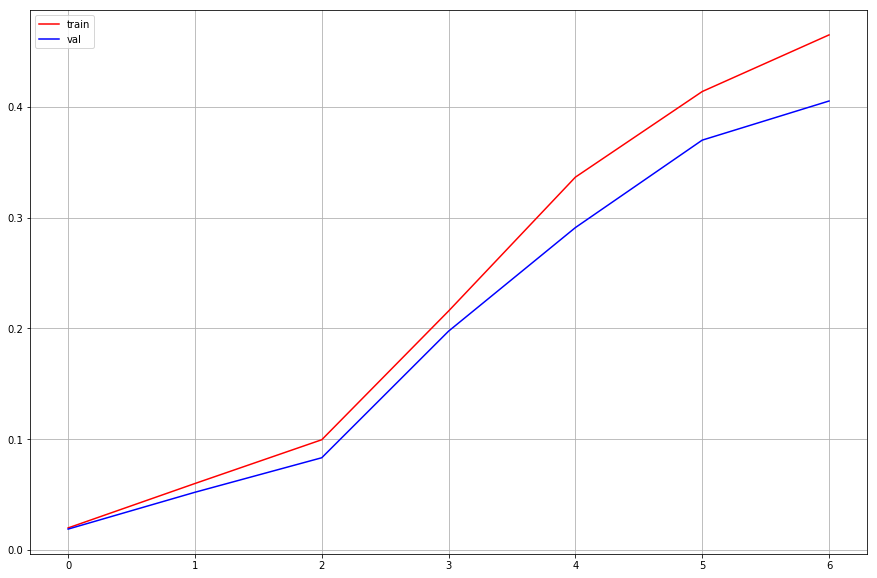

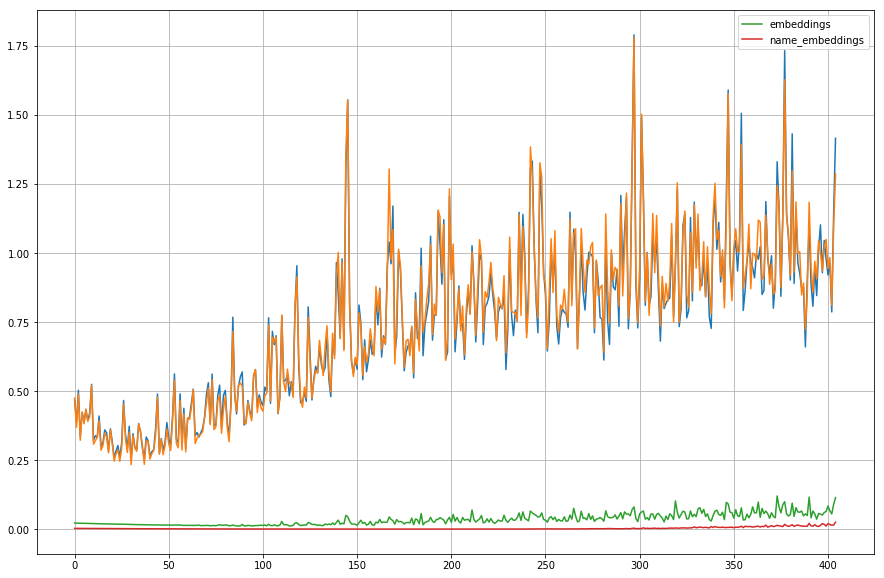

In [ ]:
trainer.train(batch_sampler, {"n_epochs":100, "validate_every":2})

In [22]:
import gc
gc.collect()

26843

Accuracy =  1.0


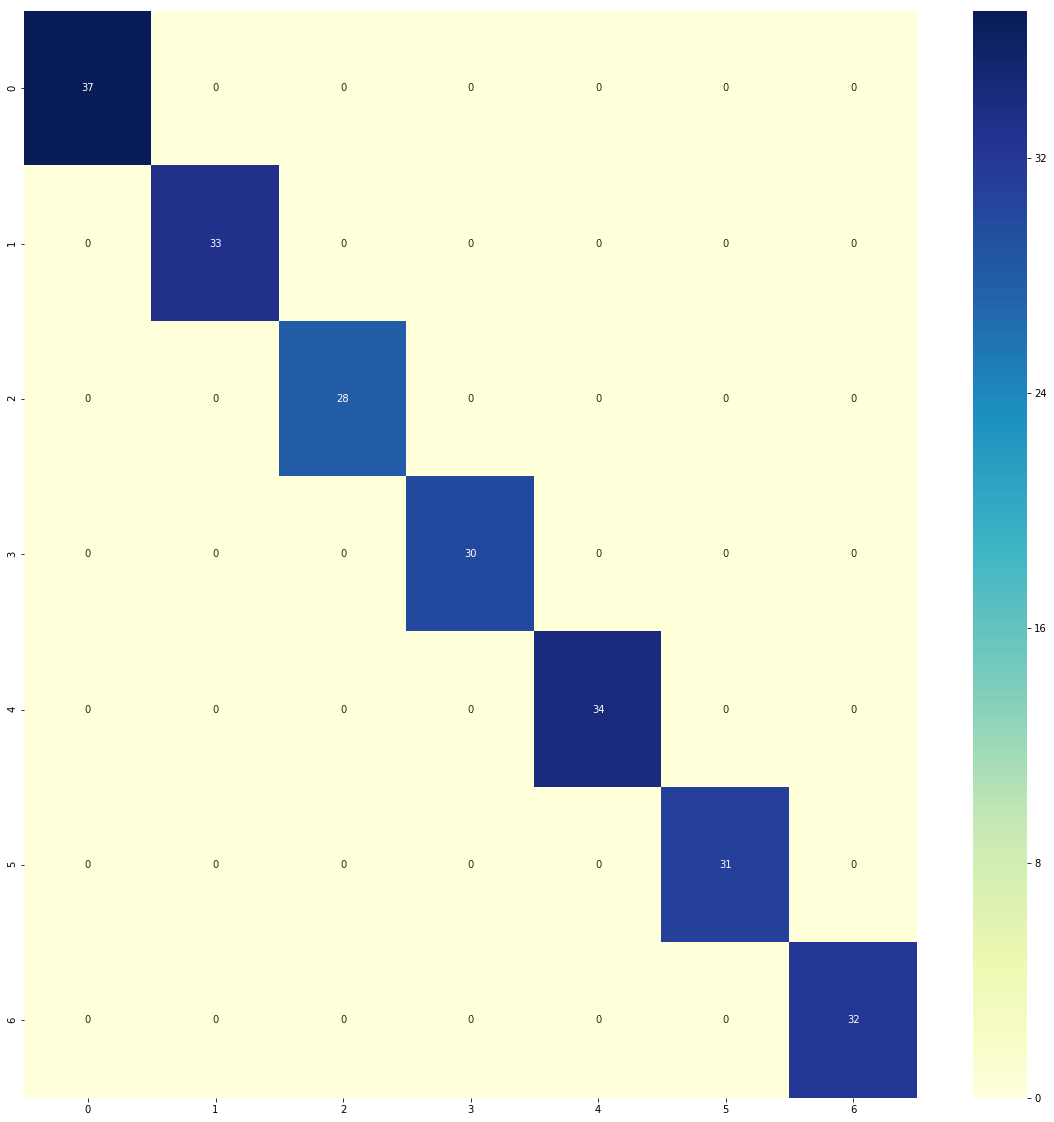

In [23]:
utilities.print_confusion_matrix(cls, batch_sampler.x_train, batch_sampler.y_train)

Accuracy =  0.9491525423728814


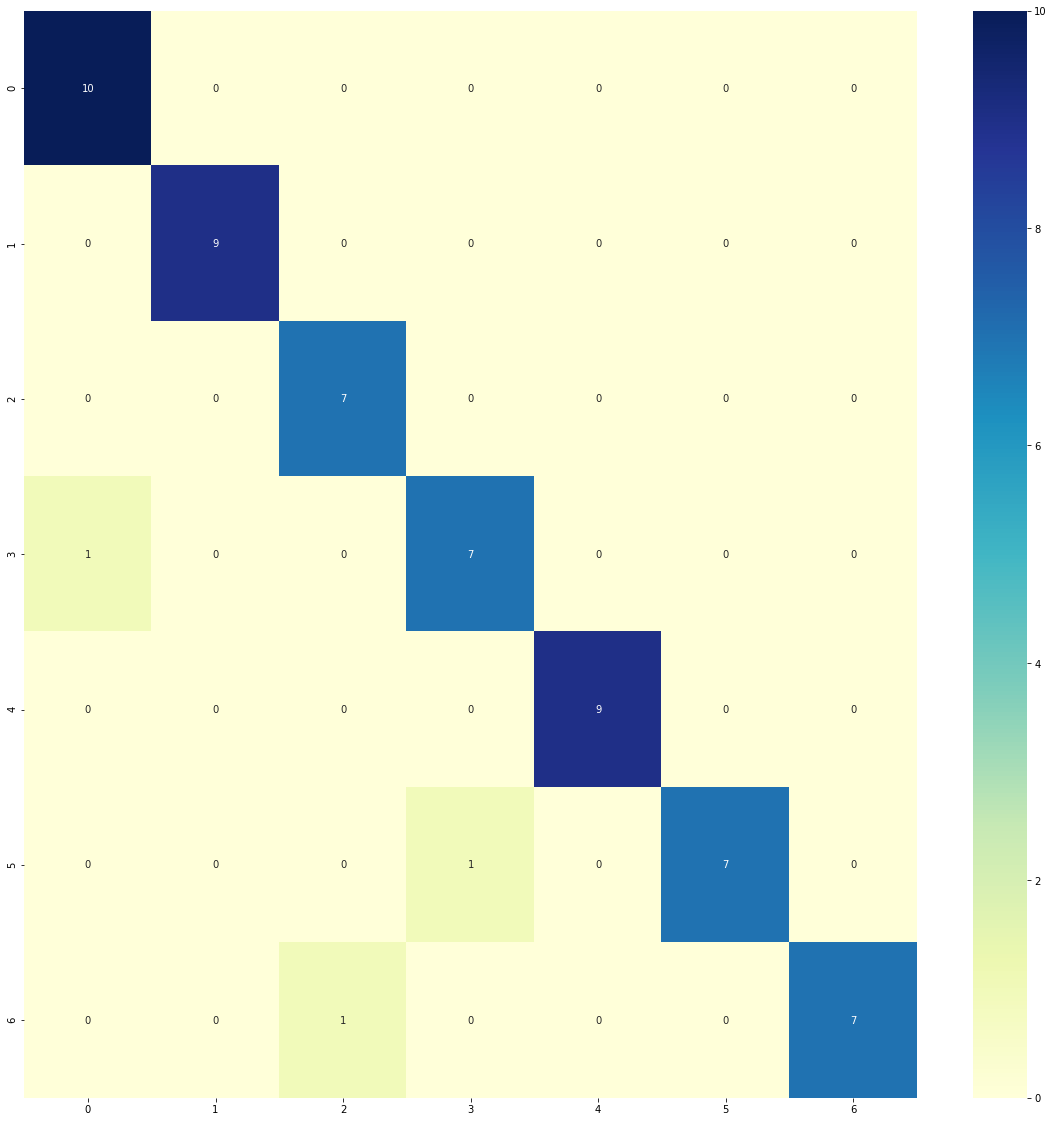

In [24]:
utilities.print_confusion_matrix(cls, batch_sampler.x_test, batch_sampler.y_test)

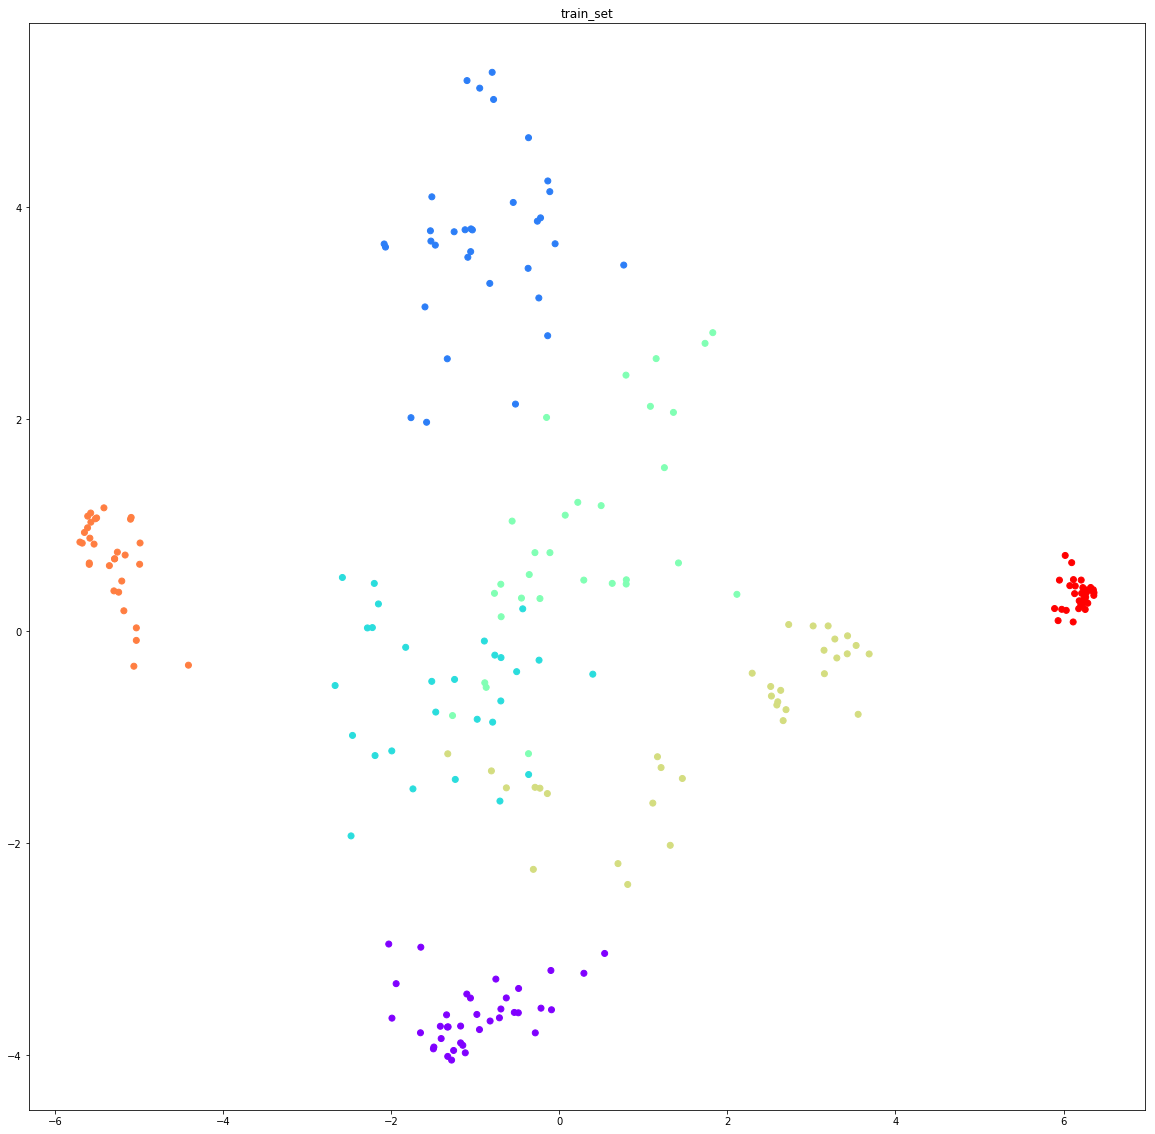

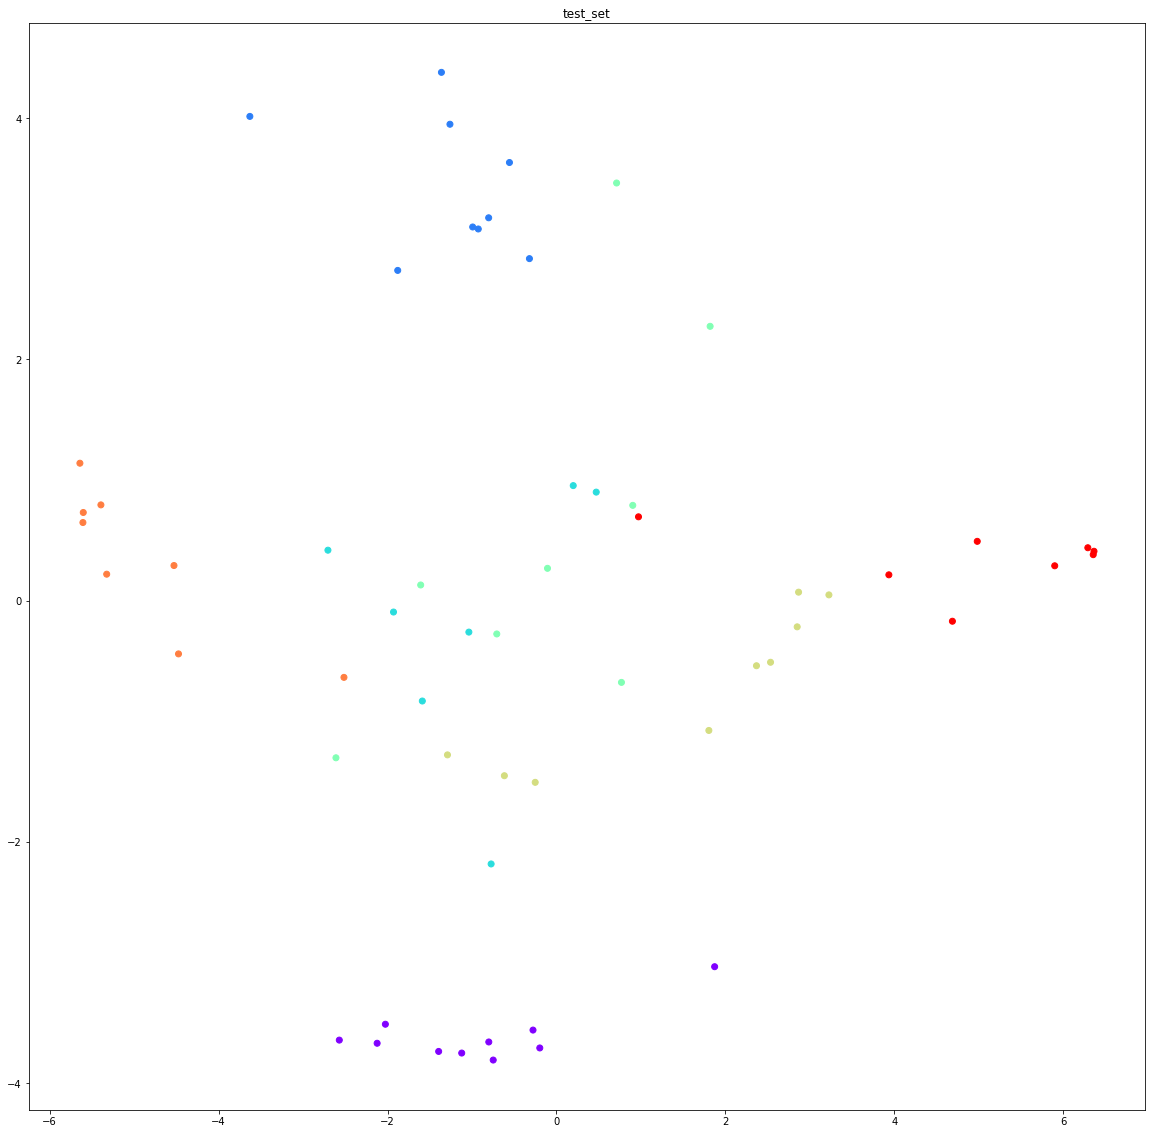

In [25]:
utilities.plot_pca(batch_sampler, cls)